In [1]:
# coding:utf-8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, metrics
from datetime import datetime as dt
from sklearn.preprocessing import LabelEncoder

# pandas
import pandas as pd
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_colwidth", 1000)

# LightGBM
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 交差検証
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# AUC
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

#catboost
from catboost import CatBoostClassifier, Pool

#offsets
import pandas.tseries.offsets as offsets

/Users/toshiki/py37env/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
train_df = pd.read_csv('../input/train.csv')
out_of_service_df = pd.read_csv('../input/out_of_service.csv')
stop_station_location_df = pd.read_csv('../input/stop_station_location.csv')
tunnel_location_df = pd.read_csv('../input/tunnel_location.csv')
diagram_df = pd.read_csv('../input/diagram.csv')
kanazawa_nosnow_df = pd.read_csv('../input/kanazawa_nosnow.csv')
weather_df = pd.read_csv('../input/weather.csv')
test_df = pd.read_csv('../input/test.csv')
sample_sabmit_df = pd.read_csv('../input/sample_submit.csv')

train_number_df = pd.read_csv('../input/train_number.csv')

In [4]:
train_df

,年月日,列車番号,停車駅名,フェンダー部分(東京方向),台車部分,フェンダー部分(金沢方向),合計
0,2016-01-19,3500E,富山,0.0,0.0,0.000000,0.000000
1,2016-01-19,562E,富山,0.0,0.0,0.000000,0.000000
2,2016-01-19,560E,糸魚川,0.0,0.0,0.000000,0.000000
3,2016-01-19,560E,富山,0.0,0.0,0.002986,0.002986
4,2016-01-19,558E,糸魚川,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...
15310,2016-12-31,554E,糸魚川,0.0,0.0,0.000000,0.000000
15311,2016-12-31,574E,糸魚川,0.0,0.0,0.000000,0.000000
15312,2016-12-31,576E,富山,0.0,0.0,0.000000,0.000000
15313,2016-12-31,558E,富山,0.0,0.0,0.000000,0.000000


In [5]:
out_of_service_df

,年月日,停車時刻,停車駅名,フェンダー部分(東京方向),台車部分,フェンダー部分(金沢方向),合計
0,2016-01-19,06:41:00,糸魚川,0.000000,0.000000,0.000000,0.000000
1,2016-01-19,19:33:00,糸魚川,0.000000,0.000000,0.004300,0.004300
2,2016-01-19,20:21:00,糸魚川,0.000000,0.012065,0.003721,0.015786
3,2016-01-19,21:42:00,糸魚川,0.000000,0.000000,0.002074,0.002074
4,2016-01-20,05:00:00,富山,0.000000,0.000000,0.001653,0.001653
5,2016-01-20,20:37:00,富山,0.000000,0.000000,0.000000,0.000000
6,2016-01-21,10:06:00,富山,0.000000,0.000000,0.000992,0.000992
7,2016-01-23,22:41:00,富山,0.000000,0.000000,0.000394,0.000394
8,2016-01-23,12:31:00,富山,0.000000,0.000000,0.000000,0.000000
9,2016-01-24,22:42:00,富山,0.007702,0.011994,0.003501,0.023197


In [6]:
stop_station_location_df

,停車場名,キロ程,緯度,経度
0,金沢,0.000,36.577817,136.647963
1,新高岡,39.620,36.726969,137.011904
2,富山,58.510,36.701322,137.213608
3,黒部宇奈月温泉,92.290,36.874050,137.481133
4,糸魚川,131.543,37.043119,137.861307
5,上越妙高,168.540,37.081591,138.248252
6,飯山,198.100,36.845166,138.358924
7,長野,228.030,36.643146,138.188645


In [7]:
tunnel_location_df

,トンネル名,始点キロ程,終点キロ程,始点緯度,始点経度,終点緯度,終点経度
0,T001,7.800,8.049,36.627109,136.708924,36.628530,136.711117
1,T002,8.190,8.470,36.629304,136.712417,36.630828,136.714863
2,T003,8.615,9.335,36.631591,136.716163,36.635594,136.722536
3,T004,9.565,12.445,36.636946,136.724478,36.655702,136.746651
4,T005,13.820,14.198,36.666148,136.754941,36.668985,136.757273
5,T006,14.755,15.205,36.675574,136.764994,36.675576,136.765003
6,T007,15.935,16.195,36.679258,136.771756,36.680334,136.774334
7,T008,16.683,23.315,36.681961,136.779407,36.673033,136.851453
8,T009,55.730,56.245,36.714750,137.188532,36.712212,137.192307
9,T010,79.760,80.359,36.778801,137.408641,36.781971,137.414077


In [8]:
diagram_df

,停車場名,3500E,552E,3502E,9536E,554E,3504E,556E,3506E,558E,3508E,560E,8526E,562E,564E,8528E,566E,9582E,568E,3510E,570E,3512E,572E,8530E,3514E,574E,8532E,576E,3516E,578E,3518E,590E
0,金沢,6:00,6:13,7:00,7:08,7:23,7:48,8:23,8:48,9:21,9:46,10:56,11:46,11:56,12:56,13:46,13:56,14:23,14:50,15:55,16:09,16:47,16:49,17:07,17:55,18:09,18:47,19:02,19:18,20:17,21:00,21:35
1,新高岡,↓,6:27,↓,7:22,7:37,↓,8:37,↓,9:35,↓,11:10,↓,12:10,13:10,↓,14:10,14:37,15:04,↓,16:23,↓,17:04,↓,↓,18:23,↓,19:16,↓,20:31,↓,21:49
2,富山,6:19,6:37,7:19,7:32,7:47,8:07,8:47,9:07,9:45,10:05,11:19,12:06,12:19,13:19,14:06,14:19,14:47,15:13,16:15,16:33,17:06,17:13,17:26,18:15,18:32,19:07,19:25,19:37,20:41,21:20,21:58
3,黒部宇奈月温泉,↓,6:50,↓,↓,7:59,↓,9:00,↓,9:57,↓,11:32,↓,12:32,13:32,↓,14:32,↓,15:26,↓,16:46,↓,17:26,↓,↓,18:45,↓,19:38,↓,20:54,↓,22:11
4,糸魚川,↓,7:04,↓,↓,8:13,↓,9:13,↓,10:11,↓,11:46,↓,12:46,13:46,↓,14:46,↓,15:40,↓,17:00,↓,17:40,↓,↓,18:59,↓,19:52,↓,21:08,↓,22:25
5,上越妙高,↓,7:17,↓,↓,8:27,↓,9:27,↓,10:25,↓,11:59,↓,12:59,13:59,↓,14:59,15:19,15:53,↓,17:13,↓,17:57,↓,↓,19:13,↓,20:09,↓,21:21,↓,22:38
6,飯山,↓,7:29,↓,↓,8:39,↓,9:39,↓,10:37,↓,12:11,↓,↓,14:11,↓,↓,↓,16:05,↓,↓,↓,18:09,↓,↓,19:25,↓,20:21,↓,21:33,↓,22:51
7,長野,7:07,7:42,8:07,8:20,9:00,8:55,10:00,9:55,11:00,10:53,12:24,12:53,13:20,14:24,14:53,15:20,15:38,16:18,17:03,17:34,17:55,18:22,18:14,19:03,19:38,19:53,20:34,20:26,21:46,22:08,23:02


In [9]:
kanazawa_nosnow_df

,2290E
0,552E
1,3502E
2,9536E
3,554E
4,2292E
5,3506E
6,3508E
7,560E
8,564E
9,566E


In [10]:
weather_df

,年月日時,地点,気温(℃),降水量(mm),降雪(cm),積雪(cm),日照時間(時間),風速(m/s),風向,日射量(MJ/㎡),現地気圧(hPa),海面気圧(hPa),相対湿度(％),蒸気圧(hPa),雲量(10分比),露点温度(℃),天気,視程(km)
0,2015/12/1 1:00,富山,9.4,2.0,0.0,0.0,0.0,1.4,西,0.0,1020.7,1022.8,86.0,10.1,NaN,7.2,NaN,NaN
1,2015/12/1 2:00,富山,9.0,0.5,0.0,0.0,0.0,1.7,南,0.0,1021.6,1023.7,88.0,10.1,NaN,7.1,NaN,NaN
2,2015/12/1 3:00,富山,9.1,0.0,0.0,0.0,0.0,0.6,西北西,0.0,1022.3,1024.4,89.0,10.3,10.0,7.4,10.0,10.0
3,2015/12/1 4:00,富山,8.8,0.5,0.0,0.0,0.0,1.7,北北西,0.0,1022.4,1024.5,88.0,10.0,NaN,6.9,NaN,NaN
4,2015/12/1 5:00,富山,8.5,0.0,0.0,0.0,0.0,1.7,南東,0.0,1022.5,1024.6,88.0,9.8,NaN,6.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17491,2017/3/31 20:00,金沢,7.4,0.0,0.0,0.0,0.0,4.0,東北東,NaN,1013.7,1017.9,63.0,6.5,NaN,0.8,NaN,NaN
17492,2017/3/31 21:00,金沢,7.5,0.0,0.0,0.0,0.0,5.0,東北東,NaN,1012.8,1016.9,63.0,6.5,10.0,0.9,4.0,15.0
17493,2017/3/31 22:00,金沢,7.4,0.0,0.0,0.0,0.0,5.4,東北東,NaN,1012.4,1016.5,63.0,6.5,NaN,0.8,NaN,NaN
17494,2017/3/31 23:00,金沢,7.4,0.0,0.0,0.0,0.0,5.1,東北東,NaN,1012.3,1016.4,62.0,6.4,NaN,0.6,NaN,NaN


In [11]:
test_df

,Unnamed: 0,年月日,列車番号
0,0,2017-01-01,3500E
1,1,2017-01-01,552E
2,2,2017-01-01,3502E
3,3,2017-01-01,9536E
4,4,2017-01-01,554E
...,...,...,...
2425,2425,2017-03-31,576E
2426,2426,2017-03-31,3516E
2427,2427,2017-03-31,578E
2428,2428,2017-03-31,3518E


In [12]:
sample_sabmit_df

,0,0.0
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
2424,2425,0.0
2425,2426,0.0
2426,2427,0.0
2427,2428,0.0


In [13]:
train_number_df

,列車番号,金沢
0,3500E,6:00
1,552E,6:13
2,3502E,7:00
3,9536E,7:08
4,554E,7:23
5,3504E,7:48
6,556E,8:23
7,3506E,8:48
8,558E,9:21
9,3508E,9:46


In [14]:
# 天気情報を埋める
weather_df['天気'] = weather_df['天気'].interpolate(limit_direction='both')
weather_df

,年月日時,地点,気温(℃),降水量(mm),降雪(cm),積雪(cm),日照時間(時間),風速(m/s),風向,日射量(MJ/㎡),現地気圧(hPa),海面気圧(hPa),相対湿度(％),蒸気圧(hPa),雲量(10分比),露点温度(℃),天気,視程(km)
0,2015/12/1 1:00,富山,9.4,2.0,0.0,0.0,0.0,1.4,西,0.0,1020.7,1022.8,86.0,10.1,NaN,7.2,10.0,NaN
1,2015/12/1 2:00,富山,9.0,0.5,0.0,0.0,0.0,1.7,南,0.0,1021.6,1023.7,88.0,10.1,NaN,7.1,10.0,NaN
2,2015/12/1 3:00,富山,9.1,0.0,0.0,0.0,0.0,0.6,西北西,0.0,1022.3,1024.4,89.0,10.3,10.0,7.4,10.0,10.0
3,2015/12/1 4:00,富山,8.8,0.5,0.0,0.0,0.0,1.7,北北西,0.0,1022.4,1024.5,88.0,10.0,NaN,6.9,9.0,NaN
4,2015/12/1 5:00,富山,8.5,0.0,0.0,0.0,0.0,1.7,南東,0.0,1022.5,1024.6,88.0,9.8,NaN,6.6,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17491,2017/3/31 20:00,金沢,7.4,0.0,0.0,0.0,0.0,4.0,東北東,NaN,1013.7,1017.9,63.0,6.5,NaN,0.8,4.0,NaN
17492,2017/3/31 21:00,金沢,7.5,0.0,0.0,0.0,0.0,5.0,東北東,NaN,1012.8,1016.9,63.0,6.5,10.0,0.9,4.0,15.0
17493,2017/3/31 22:00,金沢,7.4,0.0,0.0,0.0,0.0,5.4,東北東,NaN,1012.4,1016.5,63.0,6.5,NaN,0.8,4.0,NaN
17494,2017/3/31 23:00,金沢,7.4,0.0,0.0,0.0,0.0,5.1,東北東,NaN,1012.3,1016.4,62.0,6.4,NaN,0.6,4.0,NaN


## 学習データ

In [15]:
train_df.fillna(0, inplace=True)

In [16]:
train_df['date'] = pd.to_datetime(train_df['年月日'])

In [17]:
# 月日変換
train_df['years'] = train_df['date'].dt.to_period('Y').astype(int).astype(float)
train_df['months'] = train_df['date'].dt.to_period('M').astype(int).astype(float)
train_df['days'] = train_df['date'].dt.to_period('D').astype(int).astype(float)
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day

train_df['停車駅名'] = train_df['停車駅名'].str.replace('富山', '0')
train_df['停車駅名'] = train_df['停車駅名'].str.replace('糸魚川', '1')
train_df['停車駅名'] = train_df['停車駅名'].astype(int)

In [18]:
X = train_df.drop(columns='合計')
y = train_df['合計']

# 不要列削除
# X = X.drop('年月日', axis=1)
# X = X.drop('列車番号', axis=1)
X = X.drop('フェンダー部分(東京方向)', axis=1)
X = X.drop('台車部分', axis=1)
X = X.drop('フェンダー部分(金沢方向)', axis=1)
X = X.drop('date', axis=1)

X = X.drop('停車駅名', axis=1)

In [19]:
# 電車金沢発車時間追加
X = pd.merge(X, train_number_df , how='left', on='列車番号')

# 金沢地点天気情報
kanazawa_weather_df = weather_df[weather_df['地点'].isin(['金沢'])]
kanazawa_weather_df['date'] = pd.to_datetime(kanazawa_weather_df['年月日時']) #年月日時変換
kanazawa_weather_df['hour'] = kanazawa_weather_df['date'].dt.to_period('H').astype(int).astype(float)

# 天気情報追加
X['年月日時'] = X['年月日']+'-' +X['金沢']
X['date'] = pd.to_datetime(X['年月日時']) #年月日時変換
X['date'] = X['date'].dt.round("H")
kanazawa_weather_df = kanazawa_weather_df.drop('年月日時', axis=1)
X = pd.merge(X, kanazawa_weather_df, how='left', on='date')

#不要列削除
X = X.drop('年月日時', axis=1)
#X = X.drop('年月日', axis=1)

X = X.drop('風向', axis=1)
X = X.drop('地点', axis=1)
X = X.drop('金沢', axis=1)
X = X.drop('年月日', axis=1)
X = X.drop('列車番号', axis=1)
X = X.drop('date', axis=1)

#天気予報制限
X = X.drop('降雪(cm)', axis=1)
X = X.drop('積雪(cm)', axis=1)
X = X.drop('日照時間(時間)', axis=1)
X = X.drop('日射量(MJ/㎡)', axis=1)
X = X.drop('現地気圧(hPa)', axis=1)
X = X.drop('海面気圧(hPa)', axis=1)
X = X.drop('蒸気圧(hPa)', axis=1)
X = X.drop('視程(km)', axis=1)
X = X.drop('雲量(10分比)', axis=1)
X = X.drop('露点温度(℃)', axis=1)

/Users/toshiki/py37env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/toshiki/py37env/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [20]:
# 学習データを1-3月に限定
X_train = X[X.month < 4]
X_train

,years,months,days,year,month,day,気温(℃),降水量(mm),風速(m/s),相対湿度(％),天気,hour
0,46.0,552.0,16819.0,2016,1,19,1.7,0.5,13.2,71.0,12.000000,403662.0
1,46.0,552.0,16819.0,2016,1,19,1.3,0.5,12.5,78.0,12.000000,403668.0
2,46.0,552.0,16819.0,2016,1,19,1.6,0.5,14.6,76.0,12.333333,403667.0
3,46.0,552.0,16819.0,2016,1,19,1.6,0.5,14.6,76.0,12.333333,403667.0
4,46.0,552.0,16819.0,2016,1,19,0.7,1.0,10.7,81.0,13.000000,403665.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3207,46.0,554.0,16891.0,2016,3,31,5.8,0.0,2.6,57.0,2.000000,405390.0
3208,46.0,554.0,16891.0,2016,3,31,10.7,0.0,1.4,42.0,2.000000,405392.0
3209,46.0,554.0,16891.0,2016,3,31,17.4,0.0,2.1,24.0,3.000000,405401.0
3210,46.0,554.0,16891.0,2016,3,31,16.6,0.0,1.6,29.0,3.000000,405402.0


In [21]:
y_test = y
y_test

0        0.000000
1        0.000000
2        0.000000
3        0.002986
4        0.000000
           ...   
15310    0.000000
15311    0.000000
15312    0.000000
15313    0.000000
15314    0.000000
Name: 合計, Length: 15315, dtype: float64

## テストデータ

In [22]:
test_df.fillna(0, inplace=True)

In [23]:
test_df['date'] = pd.to_datetime(test_df['年月日'])

In [24]:
# 月日変換
test_df['years'] = test_df['date'].dt.to_period('Y').astype(int).astype(float)
test_df['months'] = test_df['date'].dt.to_period('M').astype(int).astype(float)
test_df['days'] = test_df['date'].dt.to_period('D').astype(int).astype(float)
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
test_df

,Unnamed: 0,年月日,列車番号,date,years,months,days,year,month,day
0,0,2017-01-01,3500E,2017-01-01,47.0,564.0,17167.0,2017,1,1
1,1,2017-01-01,552E,2017-01-01,47.0,564.0,17167.0,2017,1,1
2,2,2017-01-01,3502E,2017-01-01,47.0,564.0,17167.0,2017,1,1
3,3,2017-01-01,9536E,2017-01-01,47.0,564.0,17167.0,2017,1,1
4,4,2017-01-01,554E,2017-01-01,47.0,564.0,17167.0,2017,1,1
...,...,...,...,...,...,...,...,...,...,...
2425,2425,2017-03-31,576E,2017-03-31,47.0,566.0,17256.0,2017,3,31
2426,2426,2017-03-31,3516E,2017-03-31,47.0,566.0,17256.0,2017,3,31
2427,2427,2017-03-31,578E,2017-03-31,47.0,566.0,17256.0,2017,3,31
2428,2428,2017-03-31,3518E,2017-03-31,47.0,566.0,17256.0,2017,3,31


In [25]:
X_test = test_df

# 不要列削除
X_test = X_test.drop('Unnamed: 0', axis=1)
#X_test = X_test.drop('年月日', axis=1)
#X_test = X_test.drop('列車番号', axis=1)
#X_test = X_test.drop('date', axis=1)
X_test

,年月日,列車番号,date,years,months,days,year,month,day
0,2017-01-01,3500E,2017-01-01,47.0,564.0,17167.0,2017,1,1
1,2017-01-01,552E,2017-01-01,47.0,564.0,17167.0,2017,1,1
2,2017-01-01,3502E,2017-01-01,47.0,564.0,17167.0,2017,1,1
3,2017-01-01,9536E,2017-01-01,47.0,564.0,17167.0,2017,1,1
4,2017-01-01,554E,2017-01-01,47.0,564.0,17167.0,2017,1,1
...,...,...,...,...,...,...,...,...,...
2425,2017-03-31,576E,2017-03-31,47.0,566.0,17256.0,2017,3,31
2426,2017-03-31,3516E,2017-03-31,47.0,566.0,17256.0,2017,3,31
2427,2017-03-31,578E,2017-03-31,47.0,566.0,17256.0,2017,3,31
2428,2017-03-31,3518E,2017-03-31,47.0,566.0,17256.0,2017,3,31


In [26]:
# 電車金沢発車時間追加
X_test = pd.merge(X_test, train_number_df , how='left', on='列車番号')

# 天気情報追加
X_test['年月日時'] = X_test['年月日']+'-' +X_test['金沢']
X_test['date'] = pd.to_datetime(X_test['年月日時']) #年月日時変換
X_test['date'] = X_test['date'].dt.round("H")
X_test = pd.merge(X_test, kanazawa_weather_df, how='left', on='date')

#不要列削除
X_test = X_test.drop('年月日時', axis=1)
#X = X.drop('年月日', axis=1)

X_test = X_test.drop('風向', axis=1)
X_test = X_test.drop('地点', axis=1)
X_test = X_test.drop('金沢', axis=1)
X_test = X_test.drop('列車番号', axis=1)
X_test = X_test.drop('年月日', axis=1)
X_test = X_test.drop('date', axis=1)

#天気予報制限
X_test = X_test.drop('降雪(cm)', axis=1)
X_test = X_test.drop('積雪(cm)', axis=1)
X_test = X_test.drop('日照時間(時間)', axis=1)
X_test = X_test.drop('日射量(MJ/㎡)', axis=1)
X_test = X_test.drop('現地気圧(hPa)', axis=1)
X_test = X_test.drop('海面気圧(hPa)', axis=1)
X_test = X_test.drop('蒸気圧(hPa)', axis=1)
X_test = X_test.drop('視程(km)', axis=1)
X_test = X_test.drop('雲量(10分比)', axis=1)
X_test = X_test.drop('露点温度(℃)', axis=1)

In [27]:
X_test

,years,months,days,year,month,day,気温(℃),降水量(mm),風速(m/s),相対湿度(％),天気,hour
0,47.0,564.0,17167.0,2017,1,1,6.1,0.0,2.4,84.0,4.0,412014.0
1,47.0,564.0,17167.0,2017,1,1,6.1,0.0,2.4,84.0,4.0,412014.0
2,47.0,564.0,17167.0,2017,1,1,6.6,0.0,4.9,78.0,4.0,412015.0
3,47.0,564.0,17167.0,2017,1,1,6.6,0.0,4.9,78.0,4.0,412015.0
4,47.0,564.0,17167.0,2017,1,1,6.6,0.0,4.9,78.0,4.0,412015.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2425,47.0,566.0,17256.0,2017,3,31,7.5,0.0,5.8,62.0,4.0,414163.0
2426,47.0,566.0,17256.0,2017,3,31,7.5,0.0,5.8,62.0,4.0,414163.0
2427,47.0,566.0,17256.0,2017,3,31,7.4,0.0,4.0,63.0,4.0,414164.0
2428,47.0,566.0,17256.0,2017,3,31,7.5,0.0,5.0,63.0,4.0,414165.0


## 学習

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
# データセットを生成する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [30]:
%%time
# パラメータを定義
lgbm_params = {
        'objective': 'regression',
        'metric': 'mse',
}

# 学習
model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval)

[1]	valid_0's l2: 4.09583e-07
[2]	valid_0's l2: 3.79155e-07
[3]	valid_0's l2: 3.56365e-07
[4]	valid_0's l2: 3.39575e-07
[5]	valid_0's l2: 3.26604e-07
[6]	valid_0's l2: 3.16483e-07
[7]	valid_0's l2: 3.09499e-07
[8]	valid_0's l2: 3.06018e-07
[9]	valid_0's l2: 3.01327e-07
[10]	valid_0's l2: 2.98717e-07
[11]	valid_0's l2: 2.9776e-07
[12]	valid_0's l2: 2.98982e-07
[13]	valid_0's l2: 2.95697e-07
[14]	valid_0's l2: 2.9415e-07
[15]	valid_0's l2: 2.96911e-07
[16]	valid_0's l2: 2.9698e-07
[17]	valid_0's l2: 2.97434e-07
[18]	valid_0's l2: 2.95639e-07
[19]	valid_0's l2: 2.95227e-07
[20]	valid_0's l2: 2.95913e-07
[21]	valid_0's l2: 2.95606e-07
[22]	valid_0's l2: 2.93856e-07
[23]	valid_0's l2: 2.96326e-07
[24]	valid_0's l2: 2.95876e-07
[25]	valid_0's l2: 2.97445e-07
[26]	valid_0's l2: 2.97583e-07
[27]	valid_0's l2: 2.98177e-07
[28]	valid_0's l2: 2.98323e-07
[29]	valid_0's l2: 2.96603e-07
[30]	valid_0's l2: 2.96738e-07
[31]	valid_0's l2: 2.99169e-07
[32]	valid_0's l2: 3.01378e-07
[33]	valid_0's l2: 3

In [31]:
# 保存
model.save_model('../output/model.txt')

In [32]:
# 保存したモデルを使う場合
#bst = lgb.Booster(model_file='model.txt')
#ypred = bst.predict(X_test, num_iteration=bst.best_iteration)

In [33]:
# テストデータを予測する
test_pred = model.predict(X_test, num_iteration=model.best_iteration)
#0以下を0にする
#df.where(test_pred['A'] > 0, 0)

In [34]:
# AUC (Area Under the Curve) を計算する
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
#auc = metrics.auc(fpr, tpr)
#print(auc)

In [35]:
# RMSE を計算する
#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
#print(rmse)

In [36]:
df_predict = pd.DataFrame(test_pred)
df_predict = df_predict.where(df_predict >= 0, 0) #0以上だけ残す
df_predict

,0
0,5.162879e-08
1,0.000000e+00
2,0.000000e+00
3,0.000000e+00
4,0.000000e+00
...,...
5049,0.000000e+00
5050,0.000000e+00
5051,0.000000e+00
5052,3.112503e-03


In [37]:
submit_df =df_predict

In [38]:
submit_df.to_csv('../output/submit.csv', header=False, index=True)

/Users/toshiki/py37env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38477 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/toshiki/py37env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/toshiki/py37env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/toshiki/py37env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22825 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/toshiki/py37env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27671 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/toshiki/py37env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py

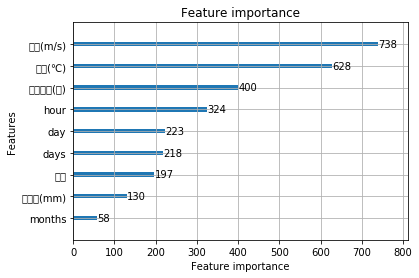

In [39]:
# 特徴量の重要度出力
model.feature_importance()

# 特徴量の重要度をプロット
lgb.plot_importance(model)

In [40]:
#予測完了